In [1]:
#import the Beautiful Soup
from bs4 import BeautifulSoup


In [2]:
#import requests 
from requests import get


In [3]:
#inorder to get webscraping we need to get the url and make a response of the URL
url = 'http://www.imdb.com/search/title?release_date=2017&sort=num_votes,desc&page=1'
response = get(url)


In [4]:
#print(response.text[:500])

#Make the html parser
html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)


bs4.BeautifulSoup

In [5]:
#movie_containers
movie_containers = html_soup.find_all('div', class_ = 'lister-item mode-advanced')


In [6]:
#first movie 
first_movie=movie_containers[1]

In [7]:
#print the title of the movie
print(first_movie.find('h3').text)


2.
Thor: Ragnarok
(2017)



In [9]:
#movie_rating
print(first_movie.strong.text)

7.9


In [19]:
#span
first_votes = first_movie.find('span', attrs = {'name':'nv'})
fv=first_votes
print(fv)
fv['data-value']

<span data-value="558682" name="nv">558,682</span>


'558682'

In [21]:
# Lists to store the scraped data in
names = []
years = []
imdb_ratings = []
metascores = []
votes = []
# Extract data from individual movie container
for container in movie_containers:
# If the movie has Metascore, then extract:
    if container.find('div', class_ = 'ratings-metascore') is not None:
# The name
        name = container.h3.a.text
        names.append(name)
    # The year
        year = container.h3.find('span', class_ = 'lister-item-year').text
        years.append(year)
    # The IMDB rating
        imdb = float(container.strong.text)
        imdb_ratings.append(imdb)
    # The Metascore
        m_score = container.find('span', class_ = 'metascore').text
        metascores.append(int(m_score))
    # The number of votes
        vote = container.find('span', attrs = {'name':'nv'})['data-value']
        votes.append(int(vote))

In [23]:
print(names)

['Logan', 'Thor: Ragnarok', 'Guardians of the Galaxy Vol. 2', 'Star Wars: Episode VIII - The Last Jedi', 'Wonder Woman', 'Dunkirk', 'Spider-Man: Homecoming', 'Get Out', 'It', 'Blade Runner 2049', 'Baby Driver', 'Three Billboards Outside Ebbing, Missouri', 'Justice League', 'The Shape of Water', 'John Wick: Chapter 2', 'Coco', 'Jumanji: Welcome to the Jungle', 'Beauty and the Beast', 'Kong: Skull Island', 'Kingsman: The Golden Circle', 'Pirates of the Caribbean: Dead Men Tell No Tales', 'Alien: Covenant', 'Lady Bird', 'The Greatest Showman', 'War for the Planet of the Apes', 'Murder on the Orient Express', 'Life', 'The Fate of the Furious', 'Call Me by Your Name', 'Wind River', 'Ghost in the Shell', 'King Arthur: Legend of the Sword', 'Mother!', "The Hitman's Bodyguard", 'I, Tonya', 'Atomic Blonde', 'The Mummy', 'Darkest Hour', 'Bright', 'Valerian and the City of a Thousand Planets', 'Baywatch', 'American Made']


In [35]:
#ipandas dataframe makes liives easier

movie_ratings = pd.DataFrame({'movie': names,
'year': years,
'imdb': imdb_ratings,
'metascore': metascores,
'votes': votes
})
print(movie_ratings.info())
movie_ratings

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   movie      42 non-null     object 
 1   year       42 non-null     object 
 2   imdb       42 non-null     float64
 3   metascore  42 non-null     int64  
 4   votes      42 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.8+ KB
None


,movie,year,imdb,metascore,votes
0,Logan,(2017),8.1,77,622129
1,Thor: Ragnarok,(2017),7.9,74,558682
2,Guardians of the Galaxy Vol. 2,(2017),7.6,67,545224
3,Star Wars: Episode VIII - The Last Jedi,(2017),7.0,84,543989
4,Wonder Woman,(2017),7.4,76,531863
5,Dunkirk,(2017),7.9,94,524081
6,Spider-Man: Homecoming,(2017),7.4,73,489576
7,Get Out,(I) (2017),7.7,85,466537
8,It,(I) (2017),7.3,69,438439
9,Blade Runner 2049,(2017),8.0,81,435816


In [37]:
movie_ratings['n_imdb'] = movie_ratings['imdb'] * 10
print(movie_ratings.head(3))
movie_ratings.to_csv('movie_ratings.csv')

                            movie    year  imdb  metascore   votes  n_imdb
0                           Logan  (2017)   8.1         77  622129    81.0
1                  Thor: Ragnarok  (2017)   7.9         74  558682    79.0
2  Guardians of the Galaxy Vol. 2  (2017)   7.6         67  545224    76.0


No handles with labels found to put in legend.


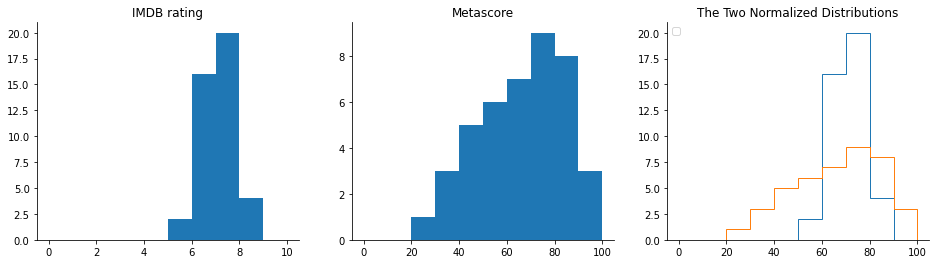

In [38]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,4))
ax1, ax2, ax3 = fig.axes
ax1.hist(movie_ratings['imdb'], bins = 10, range = (0,10)) # bin range = 1
ax1.set_title('IMDB rating')
ax2.hist(movie_ratings['metascore'], bins = 10, range = (0,100)) # bin range = 10
ax2.set_title('Metascore')
ax3.hist(movie_ratings['n_imdb'], bins = 10, range = (0,100), histtype = 'step')
ax3.hist(movie_ratings['metascore'], bins = 10, range = (0,100), histtype = 'step')
ax3.legend(loc = 'upper left')
ax3.set_title('The Two Normalized Distributions')
for ax in fig.axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.show()